In [13]:
import subprocess
finp = """INSTRUMENTAL
X-RAY
1.5418
PSEUDO-VOIGT .89 -.32 .08 .6 trim
STRUCTURAL
2.52 2.52 2.06 120
6/MMM
2
LAYER 1
CENTROSYMMETRIC
C   1 -1/3 -1/6 -1/8 1 1
LAYER 2
CENTROSYMMETRIC
C   1 1/3 1/6 -1/8 1 1
STACKING
recursive
infinite
TRANSITIONS
.7 2/3 1/3 1
.3 0 0 1
.3 0 0 1
.7 -2/3 -1/3 1
"""
with open("/tmp/Test2.inp","w") as f:
    f.write(finp)
inp = b"""/tmp/Test2.inp
0
0
3
5 60 0.01
1
1
"""
rv = subprocess.run(["/home/idies/workspace/DIFFaX_1813/DIFFaX"], input=inp, cwd="/home/idies/workspace/DIFFaX_1813", capture_output=True)
for x in rv.stdout.splitlines(): print(x)

b' ***************************************************'
b' ***************************************************'
b' *                                                 *'
b' *  DDDD     II   FFFFFF   FFFFFF           X   X  *'
b' *  D   D    II   F        F        aaaa     X X   *'
b' *  D    D   II   FFFF     FFFF    a    a     X    *'
b' *  D   D    II   F        F       a   aa    X X   *'
b' *  DDDD     II   F        F        aaa a   X   X  *'
b' *                                                 *'
b' ***************************************************'
b' ****************** DIFFaX v1.813 ******************'
b' ***************************************************'
b' ***************** 19th May,  2010 *****************'
b' ***************************************************'
b' *                                                 *'
b' *   A computer program for calculating            *'
b' *   Diffraction Intensity From Faulted Crystals   *'
b' *                                            

In [17]:
import csv
import numpy as np
with open("/tmp/Test2.spc","r",newline='') as f:
    arr = []
    opf = csv.reader(f, delimiter='\t')
    for r in opf:
        arr.append(r)
    pred = np.array(arr,dtype=np.float64)
    print(pred)


[[5.00000e+00 1.31584e-01 5.91151e-02]
 [5.01000e+00 1.30541e-01 6.24738e-02]
 [5.02000e+00 1.29507e-01 6.57509e-02]
 ...
 [5.99700e+01 9.91658e-03 6.16521e-03]
 [5.99800e+01 9.91757e-03 5.99395e-03]
 [5.99900e+01 8.99254e-03 5.82187e-03]]


<IPython.core.display.Javascript object>


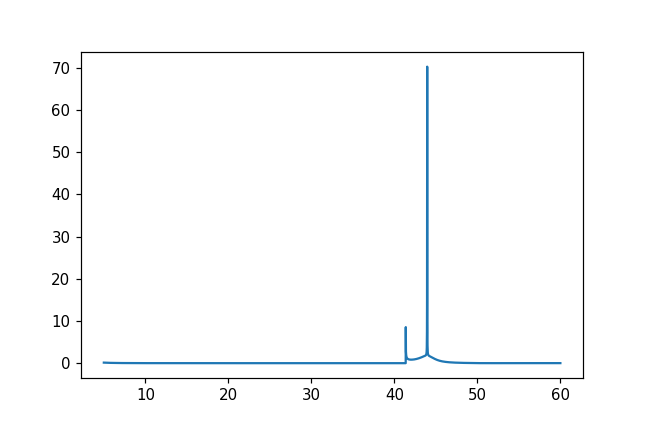

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(pred[:,0],pred[:,1])

In [36]:
import ase.io
nb3cl8 = ase.io.read('Nb3Cl8_300K.cif')
abcalbega = nb3cl8.get_cell_lengths_and_angles()
abcga = "{a:.6f} {b:.6f} {c:.6f} {g:.3f}".format(a=abcalbega[0],b=abcalbega[1],c=abcalbega[2],g=abcalbega[5])
print(abcga)
#print(nb3cl8.get_scaled_positions(),nb3cl8.get_chemical_symbols())
layer1 = ""
an = 1
for sym,xyz in zip(nb3cl8.get_chemical_symbols(),nb3cl8.get_scaled_positions()):
    layer1 += "\n{sym:4s} {n} {x:.6f} {y:.6f} {z:.6f} 1.0 1.0".format(sym=sym,n=an,x=xyz[0],y=xyz[1],z=xyz[2])
    an += 1
layer1 = layer1.strip()
print(layer1)
trans = ""
nlayers = 2
for n in range(0,nlayers):
    for m in range(0,nlayers):
        trans += "\n{prob} {dx:.6f} {dy:.6f} {dz:.6f}".format(prob=0.5,dx=0,dy=0,dz=1)
trans = trans.strip()
print(trans)

6.745660 6.745660 12.280560 120.000
Nb   1 0.527630 0.055250 0.245770 1.0 1.0
Nb   2 0.472370 0.944750 0.754230 1.0 1.0
Nb   3 0.944750 0.472380 0.245770 1.0 1.0
Nb   4 0.055250 0.527620 0.754230 1.0 1.0
Nb   5 0.527620 0.472370 0.245770 1.0 1.0
Nb   6 0.472380 0.527630 0.754230 1.0 1.0
Cl   7 0.666667 0.333333 0.097800 1.0 1.0
Cl   8 0.333333 0.666667 0.902200 1.0 1.0
Cl   9 0.333333 0.666667 0.355500 1.0 1.0
Cl   10 0.666667 0.333333 0.644500 1.0 1.0
Cl   11 0.669600 0.834800 0.135000 1.0 1.0
Cl   12 0.330400 0.165200 0.865000 1.0 1.0
Cl   13 0.165200 0.834800 0.135000 1.0 1.0
Cl   14 0.834800 0.165200 0.865000 1.0 1.0
Cl   15 0.165200 0.330400 0.135000 1.0 1.0
Cl   16 0.834800 0.669600 0.865000 1.0 1.0
Cl   17 0.337400 0.168700 0.383500 1.0 1.0
Cl   18 0.662600 0.831300 0.616500 1.0 1.0
Cl   19 0.831300 0.168700 0.383500 1.0 1.0
Cl   20 0.168700 0.831300 0.616500 1.0 1.0
Cl   21 0.831300 0.662600 0.383500 1.0 1.0
Cl   22 0.168700 0.337400 0.616500 1.0 1.0
0.5 0.000000 0.000000 1.000

In [37]:
finp = """INSTRUMENTAL
X-RAY
1.5418
PSEUDO-VOIGT .89 -.32 .08 .6 trim
STRUCTURAL
{abcga}
UNKNOWN
2
LAYER 1
NONE
{layer1}
LAYER 2 = 1
STACKING
recursive
infinite
TRANSITIONS
{trans}
""".format(abcga=abcga,layer1=layer1,trans=trans)
print(finp)

INSTRUMENTAL
X-RAY
1.5418
PSEUDO-VOIGT .89 -.32 .08 .6 trim
STRUCTURAL
6.745660 6.745660 12.280560 120.000
UNKNOWN
2
LAYER 1
NONE
Nb   1 0.527630 0.055250 0.245770 1.0 1.0
Nb   2 0.472370 0.944750 0.754230 1.0 1.0
Nb   3 0.944750 0.472380 0.245770 1.0 1.0
Nb   4 0.055250 0.527620 0.754230 1.0 1.0
Nb   5 0.527620 0.472370 0.245770 1.0 1.0
Nb   6 0.472380 0.527630 0.754230 1.0 1.0
Cl   7 0.666667 0.333333 0.097800 1.0 1.0
Cl   8 0.333333 0.666667 0.902200 1.0 1.0
Cl   9 0.333333 0.666667 0.355500 1.0 1.0
Cl   10 0.666667 0.333333 0.644500 1.0 1.0
Cl   11 0.669600 0.834800 0.135000 1.0 1.0
Cl   12 0.330400 0.165200 0.865000 1.0 1.0
Cl   13 0.165200 0.834800 0.135000 1.0 1.0
Cl   14 0.834800 0.165200 0.865000 1.0 1.0
Cl   15 0.165200 0.330400 0.135000 1.0 1.0
Cl   16 0.834800 0.669600 0.865000 1.0 1.0
Cl   17 0.337400 0.168700 0.383500 1.0 1.0
Cl   18 0.662600 0.831300 0.616500 1.0 1.0
Cl   19 0.831300 0.168700 0.383500 1.0 1.0
Cl   20 0.168700 0.831300 0.616500 1.0 1.0
Cl   21 0.831300 0.

In [41]:
import os
with open("/tmp/Test3.inp","w") as f:
    f.write(finp)
os.remove("/tmp/Test3.spc")
inp = b"""/tmp/Test3.inp
0
0
3
5 60 0.01
1
1
"""
rv = subprocess.run(["/home/idies/workspace/DIFFaX_1813/DIFFaX"], input=inp, cwd="/home/idies/workspace/DIFFaX_1813", capture_output=True)
for x in rv.stdout.splitlines(): print(x)

b' ***************************************************'
b' ***************************************************'
b' *                                                 *'
b' *  DDDD     II   FFFFFF   FFFFFF           X   X  *'
b' *  D   D    II   F        F        aaaa     X X   *'
b' *  D    D   II   FFFF     FFFF    a    a     X    *'
b' *  D   D    II   F        F       a   aa    X X   *'
b' *  DDDD     II   F        F        aaa a   X   X  *'
b' *                                                 *'
b' ***************************************************'
b' ****************** DIFFaX v1.813 ******************'
b' ***************************************************'
b' ***************** 19th May,  2010 *****************'
b' ***************************************************'
b' *                                                 *'
b' *   A computer program for calculating            *'
b' *   Diffraction Intensity From Faulted Crystals   *'
b' *                                            

In [42]:
import csv
import numpy as np
with open("/tmp/Test3.spc","r",newline='') as f:
    arr = []
    opf = csv.reader(f, delimiter='\t')
    for r in opf:
        arr.append(r)
    pred = np.array(arr,dtype=np.float64)
    print(pred)

[[  5.      50.1723  52.2393]
 [  5.01    49.812   53.5918]
 [  5.02    49.4551  54.9143]
 ...
 [ 59.97    16.7069 105.836 ]
 [ 59.98    17.7004 104.533 ]
 [ 59.99    18.1691 103.281 ]]


<IPython.core.display.Javascript object>


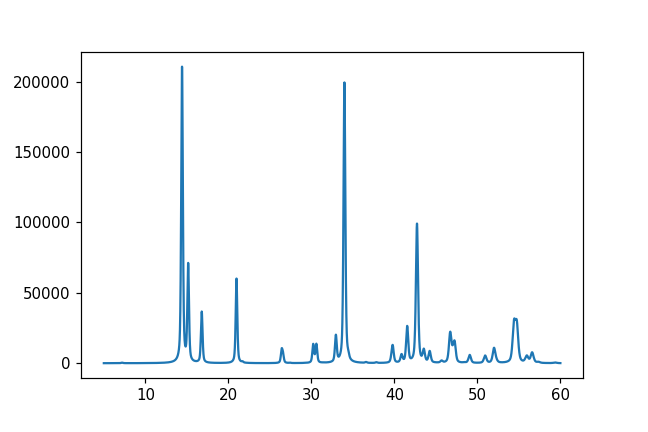

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(pred[:,0],pred[:,2])